*Running installs below:*

In [62]:
!pip install sumy rake-nltk scikit-learn wordcloud matplotlib spacy nltk pytextrank
!python -m spacy download fr_core_news_sm
# !python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 12.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [63]:
# Import necessary libraries
#For spacy text ranking:
import spacy
import pytextrank

#For sumy + rake text rankings:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
print(nltk.data.path)
nltk.download('stopwords') # Download stopwords resource
french_stopwords = stopwords.words('french')
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from rake_nltk import Rake

#For TF-IDF + Ngram text rankings:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#For plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud

['/home/bglid/nltk_data', '/home/bglid/miniconda3/envs/br_int/nltk_data', '/home/bglid/miniconda3/envs/br_int/share/nltk_data', '/home/bglid/miniconda3/envs/br_int/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /home/bglid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/bglid/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bglid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## The following cells are for NLP preprocessing of the data

In [64]:
# Load SpaCy model
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('textrank')

In [65]:
# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

In [66]:
# Function for TextRank keyword extraction using sumy
def extract_keywords_textrank(text):
    parser = PlaintextParser.from_string(text, Tokenizer('french'))
    summarizer = TextRankSummarizer()
    keywords = summarizer(parser.document, 10)  # Extract 10 keywords
    return [str(kw) for kw in keywords]

In [67]:
# Function for RAKE keyword extraction
def extract_keywords_rake(text):
    rake = Rake(stopwords=french_stopwords)
    rake.extract_keywords_from_text(text)
    return rake.get_ranked_phrases()

# Function for TF-IDF keyword extraction
def extract_keywords_tfidf(corpus):
    vectorizer = TfidfVectorizer(stop_words=french_stopwords, max_features=10)
    X = vectorizer.fit_transform(corpus)
    keywords = vectorizer.get_feature_names_out()
    return keywords

# Function for n-gram extraction
def extract_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=french_stopwords)
    ngrams = vectorizer.fit_transform([text])
    return vectorizer.get_feature_names_out()

In [68]:
#Function for Spacy + Textrank keyword extraction:
def spacy_keywords(text):
    doc = nlp(text)
    #Getting the top phrases in the doc
    phrase_list = []
    for phrase in doc._.phrases:
        phrase_list.append(phrase.text)
        
    return phrase_list

In [69]:
# Function for keyword visualization
def visualize_keywords(keywords):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Below is the cell that allows the choice between manually entered text, or text entered via .txt upload

 - NOTE: Depending on Feedback, we'll want to adjust this to work best for team's use case.

In [71]:
# Asking the user to choose between entering text or uploading a file
option = input("Would you like to upload a text file or enter text manually? Type 'file' for file upload or 'text' for manual entry: ")

if option.lower() == 'text':
    # Manually entering text
    user_text = input("Please enter your sample text: ")

elif option.lower() == 'file':
    # Uploading a file
    # uploaded = files.upload()
    #Example of reading in a file from a directory
    sample_dir = '../Radicalism_Verbalized_NLP/sample_data/fra_news_2023_100K-sentences.txt'

    # Assuming a single file is uploaded and it's a .txt file
    # file_name = next(iter(uploaded))  # Get the first uploaded file's name
    with open(sample_dir, 'r') as file:
        user_text = file.read()[:2500]
    # user_text = docs

else:
    print("Invalid option. Please run the cell again and enter either 'file' or 'text'.")




Preprocessed Text: ['1', '\t', '103', 'candidat', 'issu', '12', 'pays', 'être', 'déclarer', 'sous-admissible', 'taux', 'global', 'admissibilité', '49,52', 'Pr', 'Ahmadou', 'Aly', 'Mbaye', 'président', 'coordonnateur', 'général', 'jury', '\n', '2', '\t', '\u200a', '13', '\u200a', 'jeune', 'âgé', '13', '16', 'an', 'consommer', 'cigarette', 'électronique', 'jetable', 'type', 'puffs', 'alarme', 'étude', 'Alliance', 'contre', 'tabac', 'act', '\n', '3', '\t', '15', 'huile', 'friture', '16', 'cher', 'mars', '2022', 'prix', 'gros', 'huil', 'chuter', '50', '\n', '4', '\t', '15', 'putain', 'année', 'errance', 'médical', 'intervention', 'chirurgical', 'examen', 'médical', 'Anna', 'venir', 'bout', 'fichu', 'syndrome', 'casse-noisette', '\n', '5', '\t', '2022', 'être', 'année', 'difficile', 'Philips', 'actionnaire', '\n', '6', '\t', '205', 'unité', 'année', 'estimation', 'besoin', 'vouloir', 'falloir', 'construire', 'nécessairement', 'nombre', 'unité', '\n', '7', '\t', '20', 'an', 'tard', 'devoir'

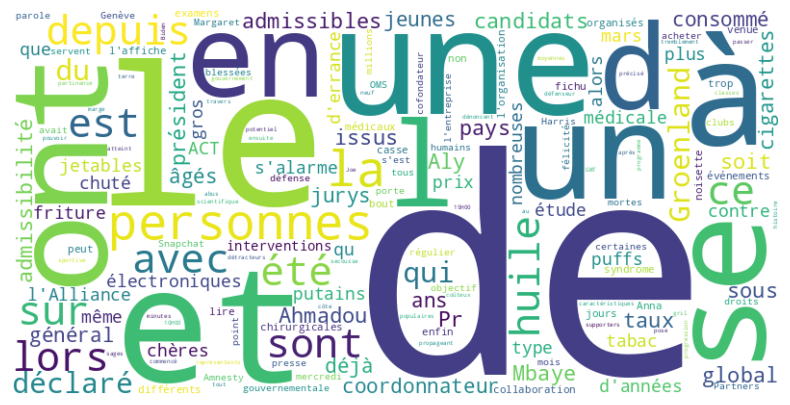

In [72]:
# Display the input text
# print("\nYour input text is:\n")
# print(user_text)

# Preprocess the text
processed_text = preprocess_text(user_text)
print("\nPreprocessed Text:", processed_text)

# Keyword extraction using various methods
# TextRank using sumy
keywords_textrank = extract_keywords_textrank(user_text)
print("\nTextRank Keywords:", keywords_textrank)

# RAKE
keywords_rake = extract_keywords_rake(user_text)
print("\nRAKE Keywords:", keywords_rake)

#Spacy Example:
keywords_spacy = spacy_keywords(user_text)
print(f'\nSpacy Keywords: {keywords_spacy}')

# TF-IDF (providing corpus as a list with one entry)
corpus = [user_text]
keywords_tfidf = extract_keywords_tfidf(corpus)
print("\nTF-IDF Keywords:", keywords_tfidf)

# n-grams (bigram example)
ngrams = extract_ngrams(user_text, 2)
print("\nBigrams:", ngrams)

# Visualization of keywords
visualize_keywords(keywords_textrank)